Linear regression

In [157]:
# Imports
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from six.moves import urllib 

import tensorflow.compat.v2.feature_column as fc 
import tensorflow as tf 

In [158]:
# Load dataset
df_train = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv") # training data
df_eval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv") # testing data
print(df_train.head())
y_train = df_train.pop('survived')
y_eval = df_eval.pop('survived')
print(df_train.describe())
print(df_train.shape)

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%

The reason we popped of survived from the two datasets is because this is data we are actually looking for. We pop it off since it is the first column in thw two datasets.
When we print out 627,9. This means we have 627 rows and 9 columns.

<Axes: >

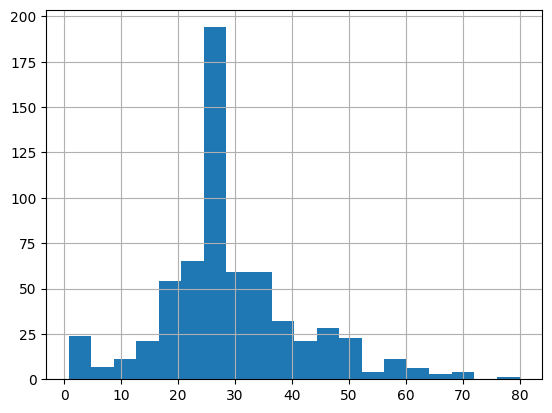

In [159]:
df_train.age.hist(bins=20)

bins=20 represents the number of intervals we divide out data into.

<Axes: xlabel='sex'>

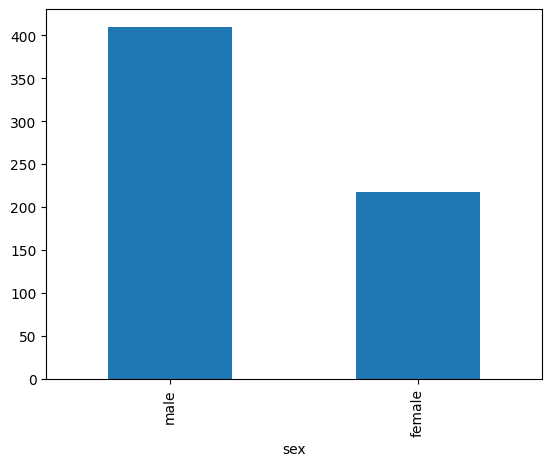

In [160]:
df_train.sex.value_counts().plot(kind="bar")

"barh" stands for horizontal diagram, and bar is the regular one (vertical).

In [161]:
CATEGORICAL_COLUMNS = ["sex","n_siblings_spouses","parch", "class","deck","embark_town","alone"]

NUMERIC_COLUMNS = ["age","fare"]

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = df_train[feature_name].unique() #gets a list of all unique values from gived feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [162]:
def make_input_fn(data_df, label_df,num_epochs=10, shuffle=True ,batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(df_train, y_train)
eval_input_fn = make_input_fn(df_eval, y_eval,num_epochs=1 ,shuffle=False)

Building the model itself.

In [163]:
linear_est = tf.estimator.LinearClassifier(feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yk/m4p39krx101g__80pp5jnt6h0000gn/T/tmpqarctf9w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Training the model

In [164]:
linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics by testing on test data

clear_output() #clears the output
print(result["accuracy"])

0.7462121


In [165]:
result = list(linear_est.predict(eval_input_fn))
clear_output()
print(df_eval.loc[2])
print(y_eval.loc[3])
print(result[2]["probabilities"][1]) # first number: not survive, second number: survive

sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
1
0.71955365
